# Import Dependacies

In [ ]:
!pip install -q nltk datasets

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## Load Data

In [ ]:
from datasets import load_dataset

#load finetuning data from HF
dataset = load_dataset("AI-MO/NuminaMath-CoT", split = "train")

#split data to train and valiadtion
from sklearn.model_selection import train_test_split

train_valid_data=dataset.train_test_split(test_size=0.2, seed=42)
test_data=train_valid_data['test']
train_data=train_valid_data['train']

# select the subset used to finetune mathlearn model
train_subset=train_data.select(range(100000))

README.md:   0%|          | 0.00/2.72k [00:00<?, ?B/s]

train-00000-of-00005.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00001-of-00005.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00002-of-00005.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00003-of-00005.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

train-00004-of-00005.parquet:   0%|          | 0.00/247M [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/166k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/859494 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/100 [00:00<?, ? examples/s]

In [ ]:
finetune_data=pd.DataFrame(train_subset) # convert to pandas dataframe for analysis

#size of the dataset used
finetune_data.shape

(100000, 4)

In [ ]:
finetune_data.head() # 4 columns

,source,problem,solution,messages
0,cn_k12,"When $x=\theta$, the function $f\left( x \righ...",To find the maximum value of the function $f\l...,"[{'content': 'When $x=\theta$, the function $f..."
1,olympiads,"If \( p \) is a prime number, show that \( 7p ...",\n1. **Case for \( p = 2 \):**\n\n Let's che...,"[{'content': 'If \( p \) is a prime number, sh..."
2,cn_k12,Given that $\sin(\frac{\pi}{6} + \alpha) = \fr...,**Step 1**: Recall the trigonometric identity ...,[{'content': 'Given that $\sin(\frac{\pi}{6} +...
3,cn_k12,The angle that has the same terminal side as $...,**Analysis**\n\nSince the angle that has the s...,[{'content': 'The angle that has the same term...
4,synthetic_amc,A value of $x$ satisfying the equation $x^2 + ...,1. Start with the given equation:\n \[ x^2 +...,[{'content': 'A value of $x$ satisfying the eq...


In [ ]:
finetune_data.messages[1]  # peek the content of the message column

[{'content': 'If \\( p \\) is a prime number, show that \\( 7p + 3^p - 4 \\) is not a square.',
  'role': 'user'},
 {'content': "\n1. **Case for \\( p = 2 \\):**\n\n   Let's check if this statement is valid for \\( p = 2 \\):\n   \\[\n   7 \\cdot 2 + 3^2 - 4 = 14 + 9 - 4 = 19\n   \\]\n   Clearly, 19 is not a perfect square. Thus, \\( 7p + 3^p - 4 \\) is not a square when \\( p = 2 \\).\n\n2. **Assume \\( p \\) is an odd prime:**\n\n   Suppose there exists an integer \\( a \\in \\mathbb{Z} \\) such that\n   \\[\n   7p + 3^p - 4 = a^2\n   \\]\n   We need to derive a contradiction from this assumption.\n\n3. **Consider modulo 4:**\n\n   Since \\( a^2 \\equiv 0 \\) or \\( 1 \\mod 4 \\), and for odd \\( p \\), \\( p \\equiv 1 \\) or \\( 3 \\mod 4 \\), we analyze \\( 7p + 3^p - 4 \\mod 4 \\).\n\n   Given \\( 7p + 3^p - 4 \\equiv p \\cdot 3 + (-1)^p - 4 \\mod 4 \\):\n   - When \\( p \\) is odd, \\( 3^p \\equiv (-1)^p \\mod 4 \\), which is \\(-1 \\) if \\( p \\equiv 3 \\mod 4 \\), \\( +1 \\) i

In [ ]:
finetune_data.isnull().sum()  # there were no missing data in the finetuning subset

,0
source,0
problem,0
solution,0
messages,0
question_length,0
response_length,0


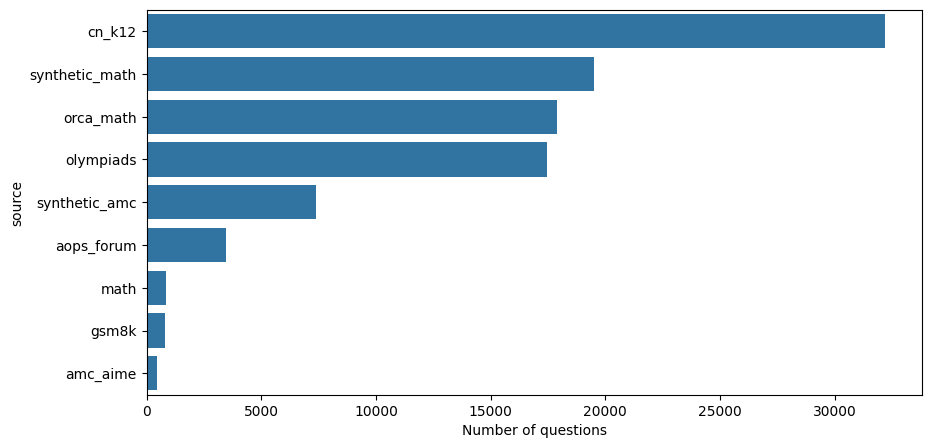

In [ ]:
# visualize the different sources of the finetuning data
no_questions=finetune_data.source.value_counts().reset_index().rename(columns={'count':'Number of questions'})
plt.figure(figsize=(10,5))
sns.barplot(y='source' ,x='Number of questions' ,data=no_questions)
plt.savefig('sources.jpg')

In [ ]:
#number of tokens of each sample in the finetuning subset
finetune_data['question_length'] = finetune_data['problem'].apply(lambda x: len(word_tokenize(x)))
finetune_data['response_length'] = finetune_data['solution'].apply(lambda x: len(word_tokenize(x)))

In [ ]:
print(f'The longest problem has {finetune_data.question_length.max()} tokens')
print(f'The longest solution has {finetune_data.response_length.max()} tokens')

The longest problem has 1572 tokens
The longest solution has 2587 tokens


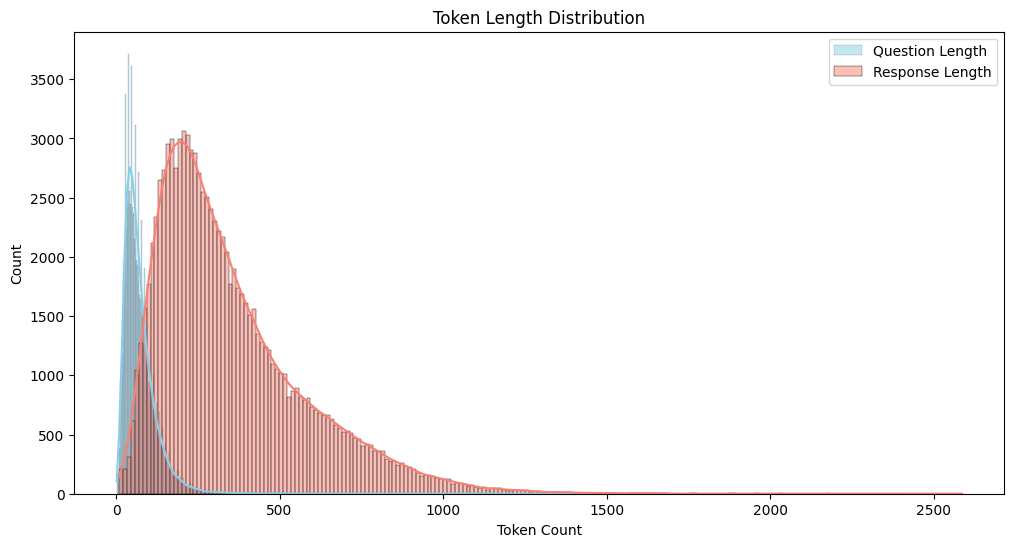

In [ ]:
#  Visulize Token Length Distribution
plt.figure(figsize=(12, 6))
sns.histplot(finetune_data['question_length'], kde=True, color='skyblue', label='Question Length')
sns.histplot(finetune_data['response_length'], kde=True, color='salmon', label='Response Length')
plt.title('Token Length Distribution')
plt.xlabel('Token Count')
plt.legend()
plt.show()

Responses tend to be longer compared to the questions in this dataset